<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/ArtigoSigmae2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolvendo equações polinomiais**

José Claudinei Ferreira
Universidade Federal de Alfenas

Este arquivo é complementar ao texto do aritgo <font color=red> Citar aqui.

A ideia é mostrar ferramentas para a construção de gráficos de funções e resolver equações polinômias com o uso da linguagem Python.

<font color=red> Editando...

#**Dos gráficos da Observação 1 do texto**

Consideramos as funções \begin{cases}
                        f(x,y)&=&x^2 -y^2 +x+ 1 \\
                        g(x,y)&=&2xy+y
                    \end{cases}

In [29]:
def f(x,y):
  return x**2-y**2+x+1

def g(x,y):
  return 2*x*y+y

Note que no texto essas funções vieram da parte real e imaginária da função complexa $$p(z)=z^2-z+1,\qquad z=x+iy.$$

Poderíamos ter usado isso aqui, como segue.

In [30]:
def p(z):
  return z**2-z+1

Temos a parte real e imaginária de $p(z)$ como:

In [31]:
z=2+3j                               # 1j denota o complexo i.
print('Para z=2+3i',', p(z)=',p(z))

Re=p(z).real
Im=p(z).imag
print('Parte real',Re,' e parte imaginária', Im)

Para z=2+3i , p(z)= (-6+9j)
Parte real -6.0  e parte imaginária 9.0


Para a construção de gráficos precisamos de alguns pacotes:

In [32]:
import numpy as np, matplotlib.pyplot as plt

E comandos para curvas de nível:

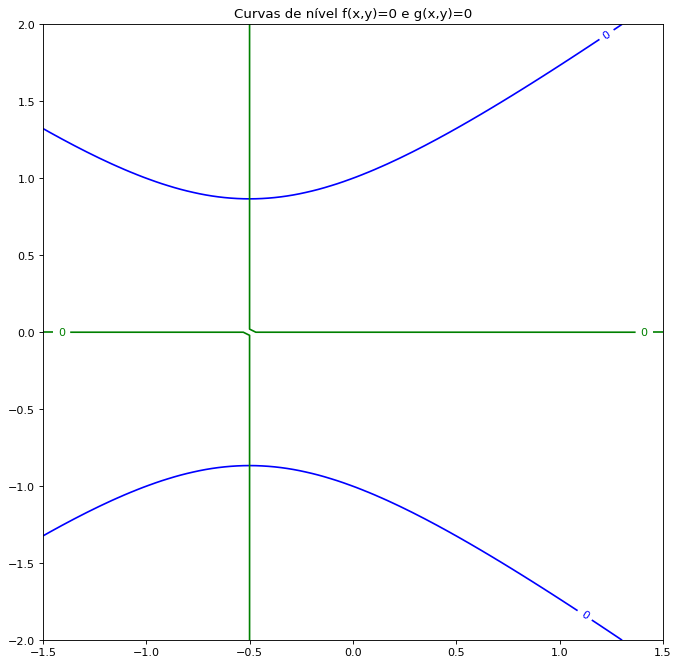

In [42]:
xf,yf = np.mgrid[-1.5:1.5:100j,-2:2:100j]
wf=0*xf
wg=0*xf

for i in range(0,100):
  for j in range(0,100):
    wf[i][j]=f(xf[i][j],yf[i][j])
    wg[i][j]=g(xf[i][j],yf[i][j])

# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wf,[0],colors='blue')
ax.clabel(CS, inline=1, fontsize=10)                  # Ajuste da fonte no gráfico.
CS = ax.contour(xf, yf, wg,[0],colors='green')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title("Curvas de nível f(x,y)=0 e g(x,y)=0")
plt.savefig('grafico7.png', format='png')  # Para salvar.
plt.show()

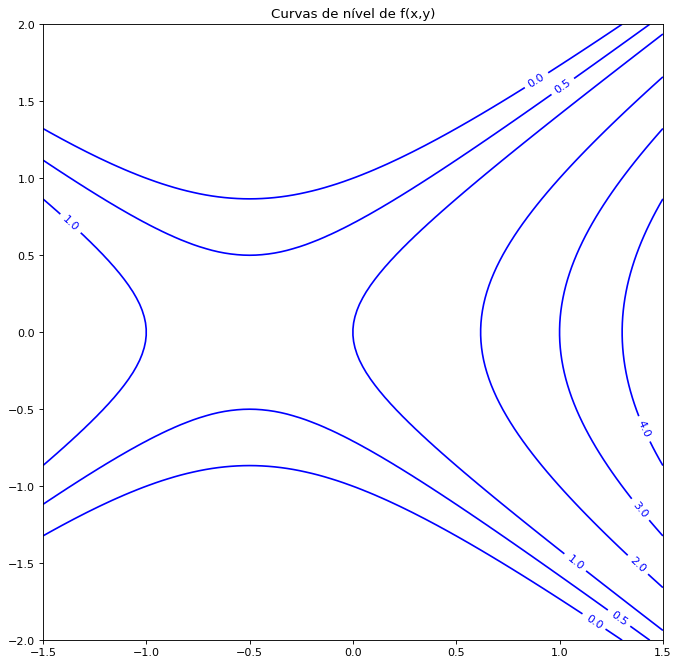

In [34]:
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wf,[0,0.5,1,2,3,4],colors='blue')
ax.clabel(CS, inline=1, fontsize=10)                  # Ajuste da fonte no gráfico.
ax.set_title("Curvas de nível de f(x,y)")
plt.savefig('grafico6a.png', format='png')  # Para salvar.
plt.show()

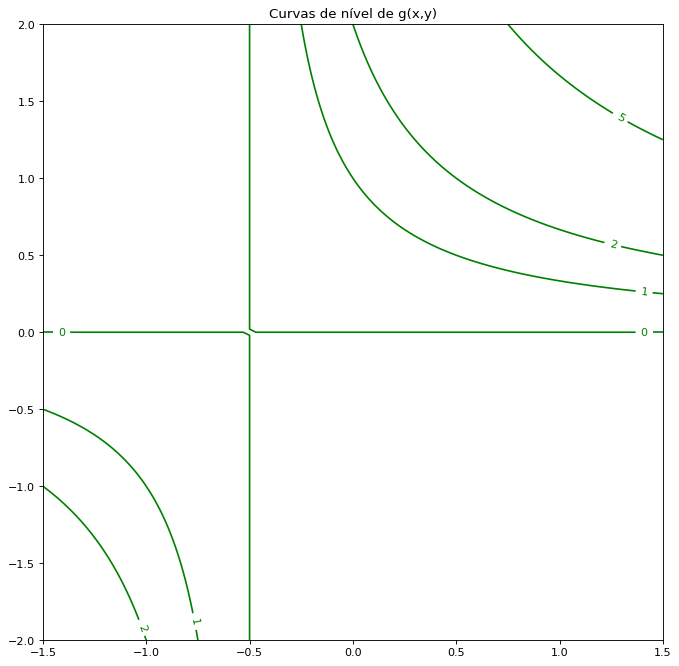

In [35]:
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wg,[0,1,2,5],colors='green')
ax.clabel(CS, inline=1, fontsize=10)                  # Ajuste da fonte no gráfico.
ax.set_title("Curvas de nível de g(x,y)")
plt.savefig('grafico6b.png', format='png')  # Para salvar.
plt.show()

Gráficos das funções:

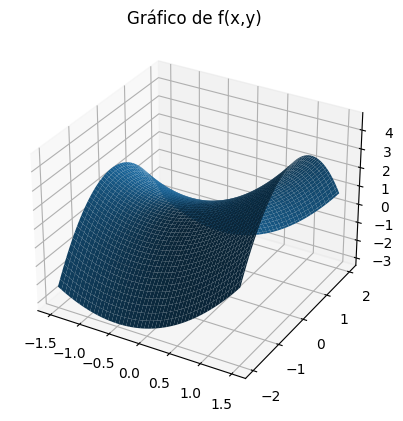

In [36]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(xf,yf,wf)
ax.set_title("Gráfico de f(x,y)")
plt.savefig('grafico5a.png', format='png')  # Para salvar.
plt.show()

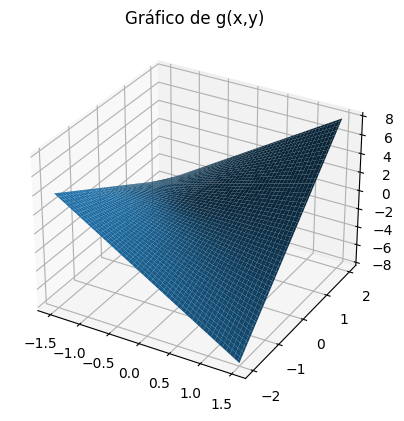

In [37]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(xf,yf,wg)
ax.set_title("Gráfico de g(x,y)")
plt.savefig('grafico5b.png', format='png')  # Para salvar.
plt.show()

#**Sobre a Figura 9 do texto**

Aqui definimos primeiro $p(z)=z^5-z+1$ e depois calculamos $p(z_0+tw)$:

In [10]:
def p(z):
  return z**5-z+1

z0=1+1j                     # 1j denota o complexo i.
a=5*z0**4-1
w=-p(z0)/a

print(z0,p(z0),a,w)

def Ft(s):                          # Restrição do módulo polinômio p(z),
  z=z0+s*w                          # sobre a curva b(t)=z0+tw
  return abs(p(z))

(1+1j) (-4-5j) (-21+0j) (-0.19047619047619047-0.23809523809523808j)


Construção da Figura 9:

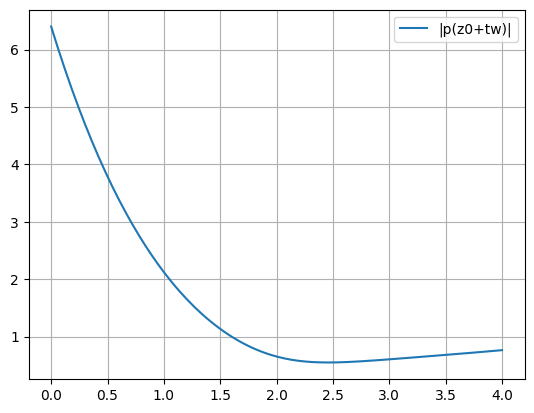

In [11]:
s=np.linspace(0,4,200)         # Vetor (lista) de números igualmante espaçados,
                                # entre 0 e 4, com 200 números.
plt.plot(s,Ft(s),label='|p(z0+tw)|')   # Comando para plotar gráfico.
plt.legend()
plt.grid()
plt.savefig('grafico9.png', format='png')  # Para salvar.
plt.show()

#**Exemplo:**

Resolvendo a equação polinomial $$x^3 -6x^2 + 12x - 6 = 0 ,$$ com o Python:

In [12]:
from sympy import symbols, Eq, solve

# Definir variável x
x = symbols('x')

# Definir equação
equacao = Eq(x**3 -6*x**2 + 12*x - 6, 0)

# Resolver a equação
solucoes = solve(equacao, x)

# Imprimir as soluções

i=1
print("As soluções por radicais da equação x^3 -6x^2 + 12x - 6 = 0 são:")
for solucao in solucoes:
    print('Solução', i,'dada por',solucao)
    i=i+1

As soluções por radicais da equação x^3 -6x^2 + 12x - 6 = 0 são:
Solução 1 dada por 2 - 2**(1/3)
Solução 2 dada por 2 - 2**(1/3)*(-1/2 - sqrt(3)*I/2)
Solução 3 dada por 2 - 2**(1/3)*(-1/2 + sqrt(3)*I/2)


Fazendo os cálculos:

In [13]:

i=1
for solucao in solucoes:
    print('Solução', i,'dada por',solucao.evalf())
    i=i+1

Solução 1 dada por 0.740078950105127
Solução 2 dada por 2.62996052494744 + 1.09112363597172*I
Solução 3 dada por 2.62996052494744 - 1.09112363597172*I


#**Exemplo:**

Resolvendo a equação polinomial $$x^5 -2x^4 + 2 = 0 ,$$ com o Python:

In [14]:
from sympy import symbols, Eq, solve

# Definir variável x
x = symbols('x')

# Definir equação
equacao = Eq(x**5 -2*x**4 + 2, 0)

# Resolver a equação
solucoes = solve(equacao, x)

# Imprimir as soluções

i=1
print("As soluções por radicais da equação x^5 -2x^4+2 = 0 são:")
for solucao in solucoes:
    print('Solução', i,'dada por',solucao)
    i=i+1

As soluções por radicais da equação x^5 -2x^4+2 = 0 são:
Solução 1 dada por CRootOf(x**5 - 2*x**4 + 2, 0)
Solução 2 dada por CRootOf(x**5 - 2*x**4 + 2, 1)
Solução 3 dada por CRootOf(x**5 - 2*x**4 + 2, 2)
Solução 4 dada por CRootOf(x**5 - 2*x**4 + 2, 3)
Solução 5 dada por CRootOf(x**5 - 2*x**4 + 2, 4)


Nesse caso não há como encontrar as soluções por radicais (Veja a referência [1]).

Para ter uma ideia de como é possível resolver computacionalmante equações polinômiais veja as referências [2] e [3]. Veja também a documentação do [pacote Simpy](https://docs.sympy.org/latest/guides/solving/solving-guidance.html).

Fazendo os cálculos numericamente:

In [15]:

i=1
for solucao in solucoes:
    print('Solução', i,'dada por',solucao.evalf())
    i=i+1

Solução 1 dada por -0.910472093668948
Solução 2 dada por 1.30022153937654
Solução 3 dada por 1.81617880630727
Solução 4 dada por -0.10296412600743 - 0.958969280993209*I
Solução 5 dada por -0.10296412600743 + 0.958969280993209*I


#**Sobre a Observação 6**

Considere agora $$p(z)=z^5-2z^4+2.$$

In [16]:
def poli(z):
  return z**5-2*z**4+2

Curvas definidas pela equação $F(u)=(Real(p(x+iy)),Img(p(x+iy))=(0,0)$.

In [17]:
def F(u):
  x=u[0]
  y=u[1]
  z=x+y*1j
  p=poli(z)
  return np.array([p.real,p.imag])

In [18]:
def g(u):
  return np.linalg.norm(F(u))

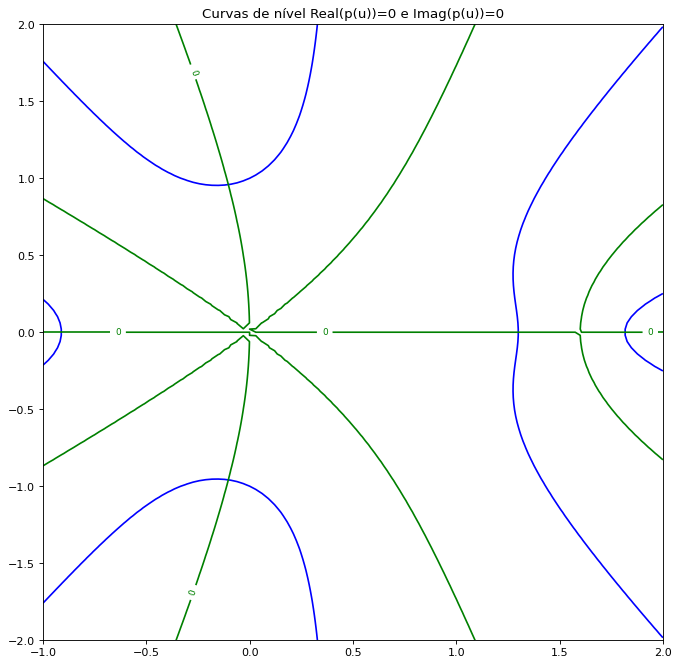

In [19]:
from mpl_toolkits.mplot3d import axes3d             # para fazer gráficos

def f1(u):
  p=F(u)[0]
  return p

def f2(u):
  p=F(u)[1]
  return p

#---------------------------------------- Para fazer gráficos de f1(x,y) e f2(x,y)
xf,yf = np.mgrid[-1:2:100j,-2:2:100j]
wf1=0*xf
wf2=0*xf
wf3=0*xf

for i in range(0,100):
  for j in range(0,100):
    p=F([xf[i][j],yf[i][j]])
    wf1[i][j]=p[0]
    wf2[i][j]=p[1]
    wf3[i][j]=p[0]**2+p[1]**2

# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, wf1,[0],colors='blue')
CS = ax.contour(xf, yf, wf2,[0],colors='green')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível Real(p(u))=0 e Imag(p(u))=0")
plt.savefig('grafico7.png', format='png')  # Para salvar.
plt.show()

**Gráficos com parte real e imaginária**

Tomando $$p(z)=z^5-2z^4+2,\qquad z=x+iy,$$ temos que
\begin{cases} p(z)&=
                x^5 + 5 i x^4 y - 2 x^4 - 10 x^3 y^2 - 8 i x^3 y - 10 i x^2 y^3 + 12 x^2 y^2 + 5 x y^4 + 8 i x y^3 + i y^5 - 2 y^4 + 2\\&=(x^5 - 2 x^4 - 10 x^3 y^2 + 12 x^2 y^2 + 5 x y^4 - 2 y^4 + 2)+(5x^4 y - 8 x^3 y - 10 x^2 y^3 + 8 x y^3 + y^5 )i
            \end{cases} e segue que \begin{cases}Real(p(z))&=x^5 - 2 x^4 - 10 x^3 y^2 + 12 x^2 y^2 + 5 x y^4 - 2 y^4 + 2 \\\\Img(p(z))&=5x^4 y - 8 x^3 y - 10 x^2 y^3 + 8 x y^3 + y^5\end{cases}

In [20]:
def Ipoli(z):
  x=z.real
  y=z.imag
  p=5*(x**4)*y - 8*(x**3)*y - 10*(x**2)*y**3 + 8*x*y**3 + y**5
  return p

def Rpoli(z):
  x=z.real
  y=z.imag
  p=x**5 - 2*x**4 - 10*(x**3)*y**2 + 12*(x**2)*y**2 + 5*x*y**4 - 2*y**4 + 2
  return p

In [21]:
z=5+3*1j
poli(z), Ipoli(z), Rpoli(z)

((-4810+948j), 948.0, -4810.0)

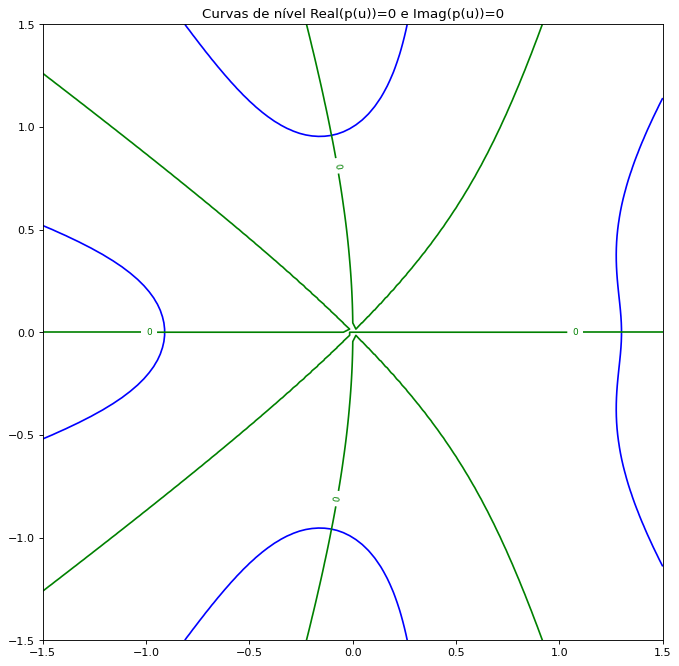

In [22]:
#---------------------------------------- Para fazer gráficos de f1(x,y) e f2(x,y)
xf,yf = np.mgrid[-1.5:1.5:100j,-1.5:1.5:100j]
w4=0*xf
w5=0*xf

for i in range(0,100):
  for j in range(0,100):
    w4[i][j]=Rpoli(xf[i][j]+yf[i][j]*1j)
    w5[i][j]=Ipoli(xf[i][j]+yf[i][j]*1j)

# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf, yf, w4,[0],colors='blue')
CS = ax.contour(xf, yf, w5,[0],colors='green')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível Real(p(u))=0 e Imag(p(u))=0")
plt.savefig('grafico6.png', format='png')  # Para salvar.
plt.show()

Gráfico de $g(x,y)$:

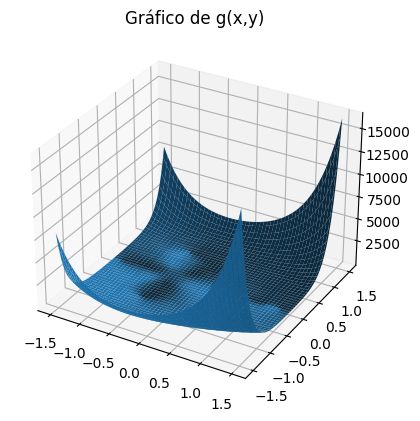

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(xf,yf,wf3)
ax.set_title("Gráfico de g(x,y)")
plt.savefig('grafico3.png', format='png')  # Para salvar.
plt.show()

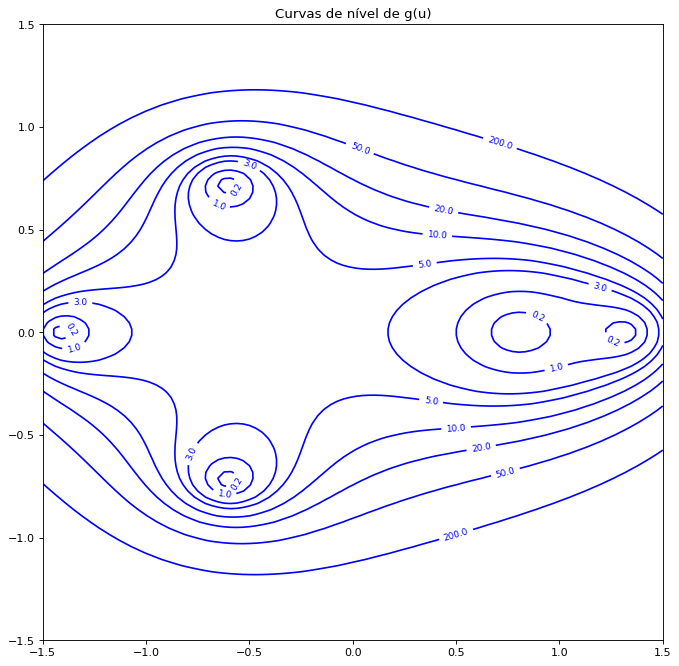

In [24]:
# Criando a figura e projeção em 3D
ig, ax = plt.subplots(figsize=(10,10), dpi=80)
CS = ax.contour(xf,yf,wf3,[0.2,1,3,5,10,20,50,200],colors='blue')
ax.clabel(CS, inline=0.5, fontsize=8)
ax.set_title("Curvas de nível de g(u)")
plt.savefig('grafico9.png', format='png')  # Para salvar.
plt.show()

#**Exemplo adicional sobre equações não polinomiais:**

Cálculo de $\cos(2+i)$.

In [25]:
import cmath

cmath.cos(2+1j)

(-0.64214812471552-1.0686074213827783j)

Note que pode resolver numericamente equação não polinomial, como $\cos(x)-x=\cos(2+i)$, por exemplo:

In [26]:
from sympy import nsolve, cos
from sympy.abc import x
p=nsolve(cos(x) - x-cmath.cos(2+1j), x, 2)
p

1.13215492278301 + 0.547647934937752*I

Teste:

In [27]:
cos(p)-p-cmath.cos(2+1j)

-1.11022302462516e-16

Veja a referência [3] para ter uma ideia de como isso é possível computacionalmente.

#**Referências**

1. Otto Endler, [Solução de equações por radicais em característica $p\geq 0$](https://rmu.sbm.org.br/wp-content/uploads/sites/27/2018/03/n05_Artigo02.pdf). RMU, SBM, n. 5, 1987.

2. Reinhard Laubenbacher, Gary McGrath, David Pengelley,
Lagrange and the Solution of Numerical Equations,
Historia Mathematica,
Volume 28, Issue 3,
2001,
Pages 220-231. DOI: [10.1006/hmat.2001.2316](https://doi.org/10.1006/hmat.2001.2316).

3. José Claudinei Ferreira, Sobre a soma dos termos de progressões geométricas e métodos numéricos para determinar autovalores e raízes de polinômios, Revista Professor de Matemática On line, 2020. DOI: [10.21711/2319023x2020/pmo816](\href{https://doi.org/10.21711/2319023x2020/pmo816).

4. José Claudinei Ferreira, Quando os métodos de Euler e Newton coincidem, Revista Matemática Universitária, 34–46, 2021. DOI: — DOI: [10.21711/26755254/rmu20213](https://doi.org/10.21711/26755254/rmu20213)

